Data Science Regression Project : predicting Home Prices in Banglore

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# TO set the deafult size of the all the figures
matplotlib.rcParams["figure.figsize"]=(20,10)

Data Load : Load banglore home pricess into a  dataframe

In [5]:
df1=pd.read_csv("D:/career/Banglore home price prediction/bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

In [7]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df1.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

Drop the feature which are not require to build our model

In [10]:

df2=df1.drop(["area_type","society","balcony","availability"],axis="columns")

In [11]:
df2.shape

(13320, 5)

Feature Engineering

Add new Feature(integer) for bhk(Bedrooms Hall Kitchen)

In [12]:
df2["bhk"]=df2["size"].apply(lambda x: int(x.split(' ')[0])if isinstance(x,str)else None)

In [13]:
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0


In [14]:
df2["size"].isnull().sum()

16

In [15]:

df2["size"].dropna()

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13304, dtype: object

In [16]:
print(df2["size"].isnull())

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319    False
Name: size, Length: 13320, dtype: bool


In [17]:
df2["size"].dropna(inplace=True)

In [18]:
df2.shape

(13320, 6)

In [19]:
df2.dropna(subset=['size'], inplace=True)


In [20]:
df2.shape

(13304, 6)

In [21]:
df2["bhk"]=df2["size"].apply(lambda x: int(x.split(' ')[0]))

df2.bhk.unique()

In [22]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2




Explore total_sqft feature

In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:



df2[~df2["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


Above shows that total_sqft can be a range (eg: 2100-2850).For such values we can just take average of min and max value in the rabge .there are such cases 34.46Sq.Meter which one can convert to sqft using conversion I am going to just drop such cases to keep things simple and we have lot of data drop rows is ok

In [25]:
def convert_sqft_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
df4=df2.copy()
df4.total_sqft=df4.total_sqft.apply(convert_sqft_to_num)
df4=df4[df4.total_sqft.notnull()]
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


For below row it shows total_sqft as 2475 which is an average of the range 2100-2850

In [27]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [28]:
(2100+2850)/2

2475.0

Featue engineering Part -02















Add new feature called price per square feet

In [29]:


df5=df4.copy()

In [30]:
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [31]:
#Add new feature called price per square feet
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"]


In [32]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:

df5_stats=df5["price_per_sqft"].describe()
df5_stats

count    1.325800e+04
mean     7.912634e+03
std      1.064936e+05
min      2.678298e+02
25%      4.271229e+03
50%      5.438331e+03
75%      7.313266e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [34]:
df5.to_csv("beng_house_price.csv",index=False)

Examone loaction which is a categorical variable .we need to apply dimensionality reduction technique here to reduce number of locations

In [35]:
print(df5.location.isnull().sum())

1


In [36]:
df5.location.shape

(13258,)

In [37]:

df5.location.dropna()

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13257, dtype: object

In [38]:
df5.location.shape

(13258,)

In [41]:
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13258, dtype: object

In [42]:
df5.dropna(subset=['location'], inplace=True)


In [43]:
df5.location=df5.location.apply(lambda x : x.strip())
location_stats=df5["location"].value_counts(ascending=False)
location_stats

location
Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [44]:
location_stats

location
Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [45]:
location_stats.values.sum()

13257

In [46]:
len(location_stats[location_stats>10])

240

In [47]:

len(location_stats[location_stats<=10])

1047

Dimensionality Reduction

Any location have less than 10 data points should be tagged as "others" location. This way number of categories can be reduced by huge amount.Later on when we do one hot encoding .It will help us with having fewer dummy columns

In [48]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar              10
BTM 1st Stage                10
Nagadevanahalli              10
Sector 1 HSR Layout          10
Basapura                     10
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [49]:
len(df5.location.unique())

1287

In [50]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [51]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft 

In [52]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


Check above data points .we have 6 bhk apartments with 1020 sqft .Another one is 8 bhk with 600 >there are clear data error that can be removed safely

In [53]:
df5.shape

(13257, 7)

In [54]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12513, 7)

In [55]:
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we can see that min price per sqft is 267 rs/sqft  and  max is 176470 ,this shows a wide range of variation in property prices .we should remove outliers per location using mean and one standard deviation

In [56]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out          
df7=remove_pps_outliers(df6)


In [57]:
df7.shape

(10288, 7)

Lets check if for a given location how the 2 BHk and 3 BHK looks like 

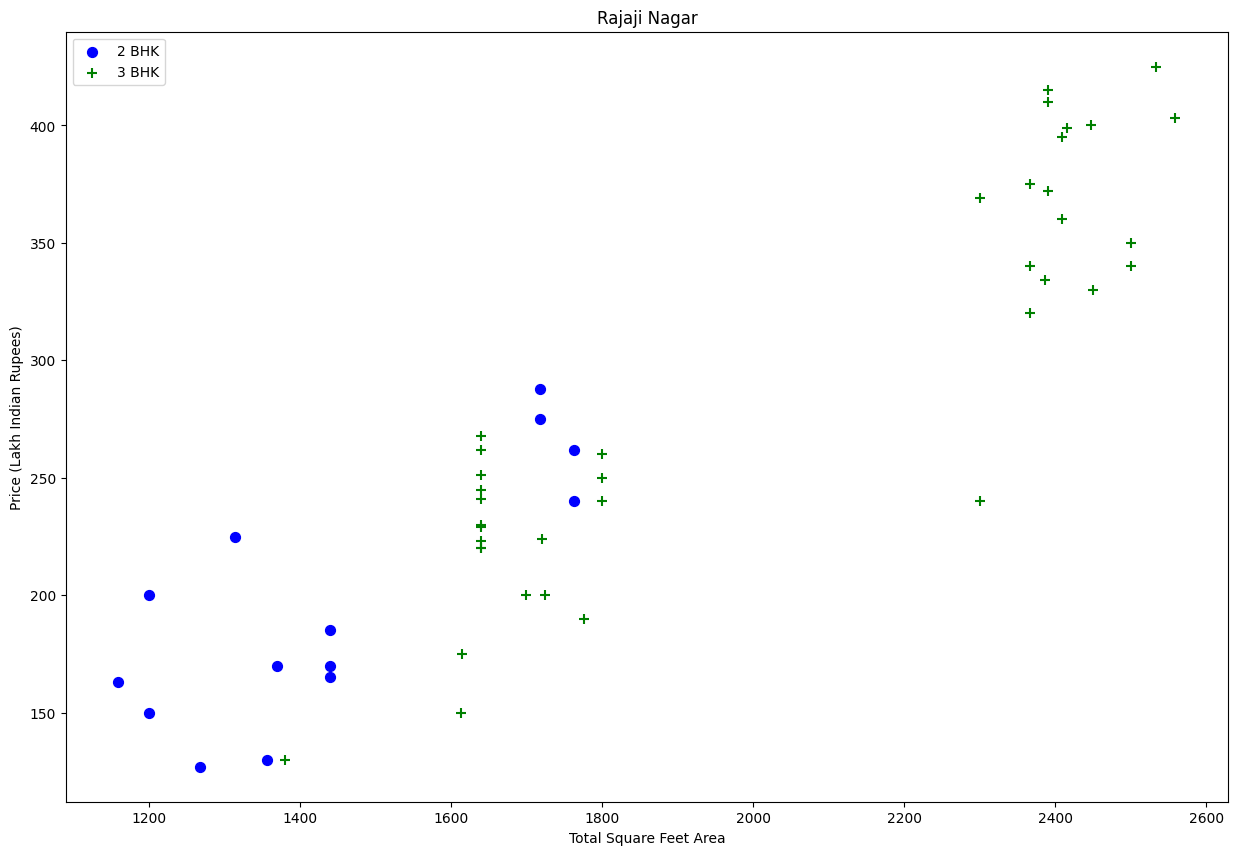

In [58]:


def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="green",label="3 BHK",s=60)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

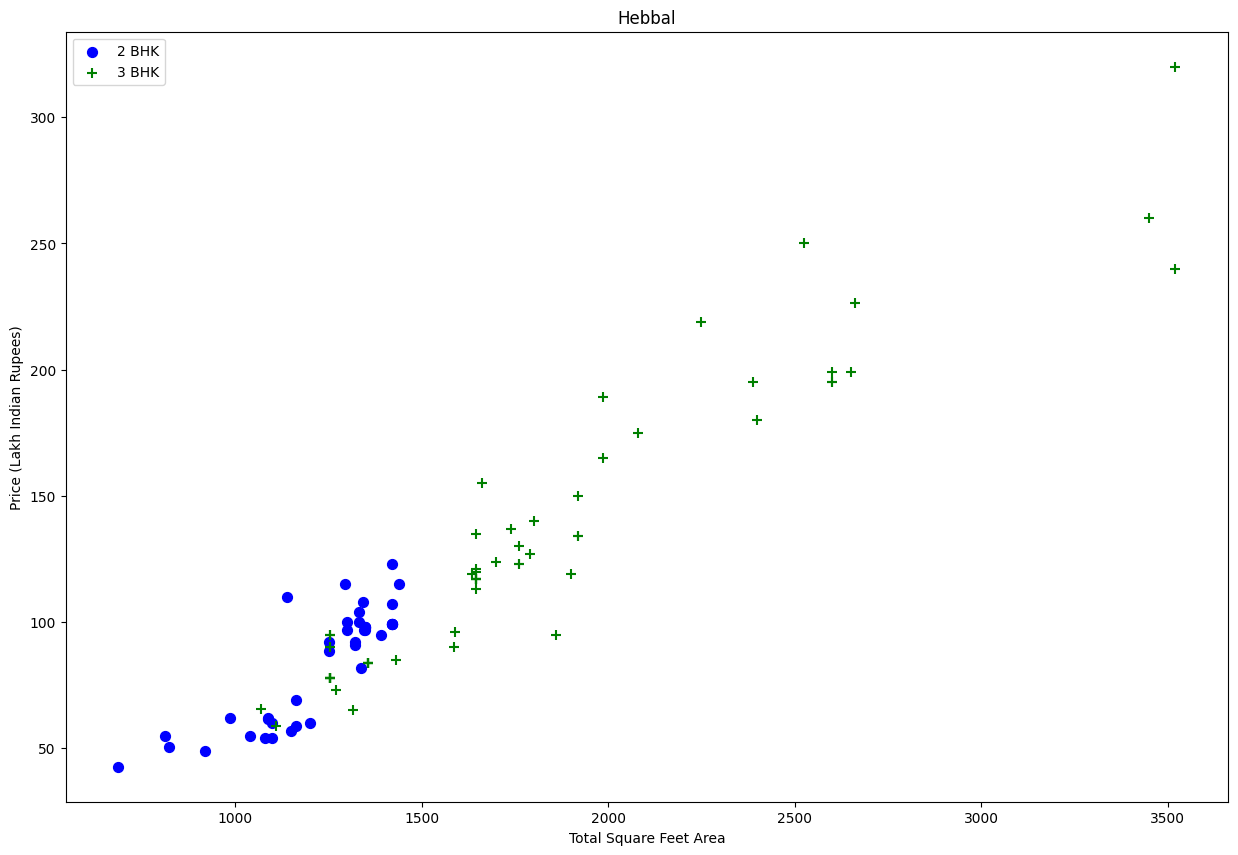

In [59]:
plot_scatter_chart(df7,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34  
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22    
    },  
    }

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [60]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7342, 7)


Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

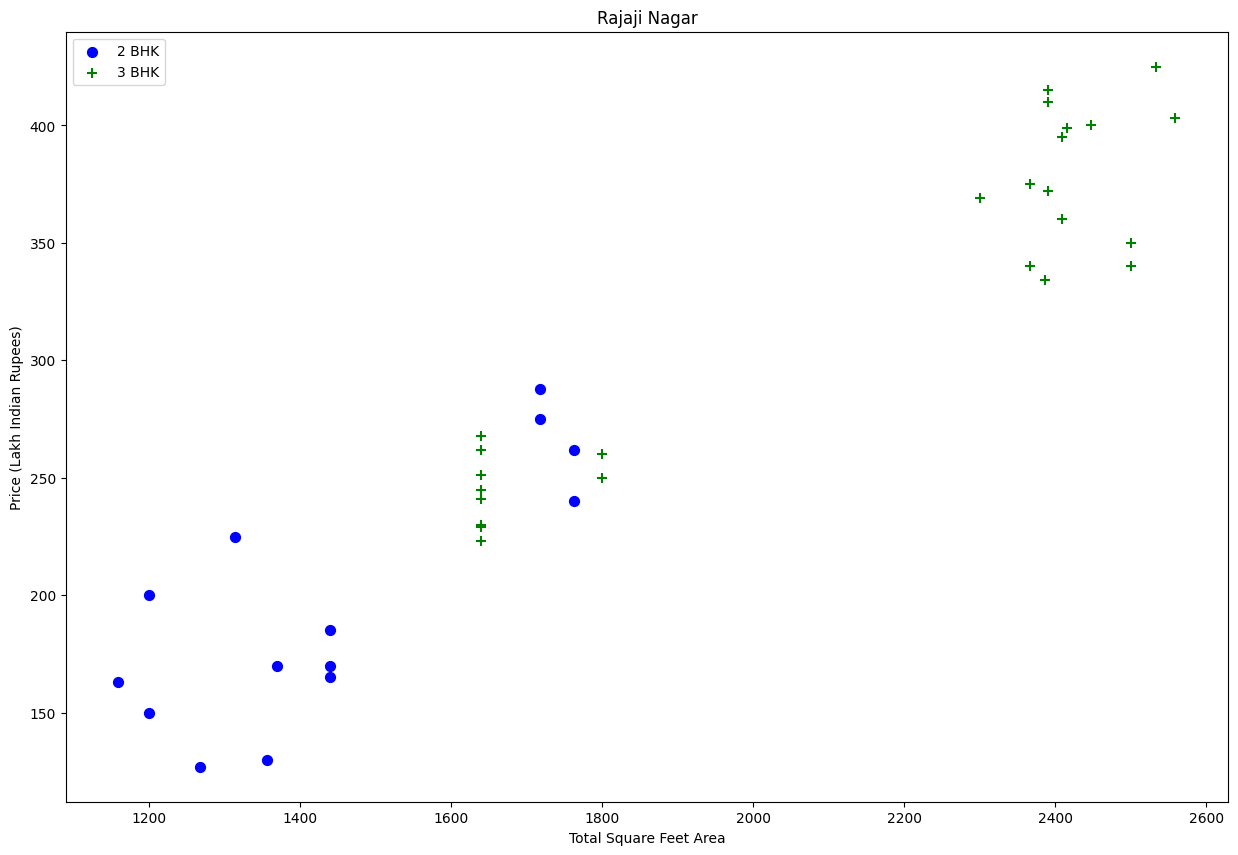

In [61]:
plot_scatter_chart(df8,"Rajaji Nagar")

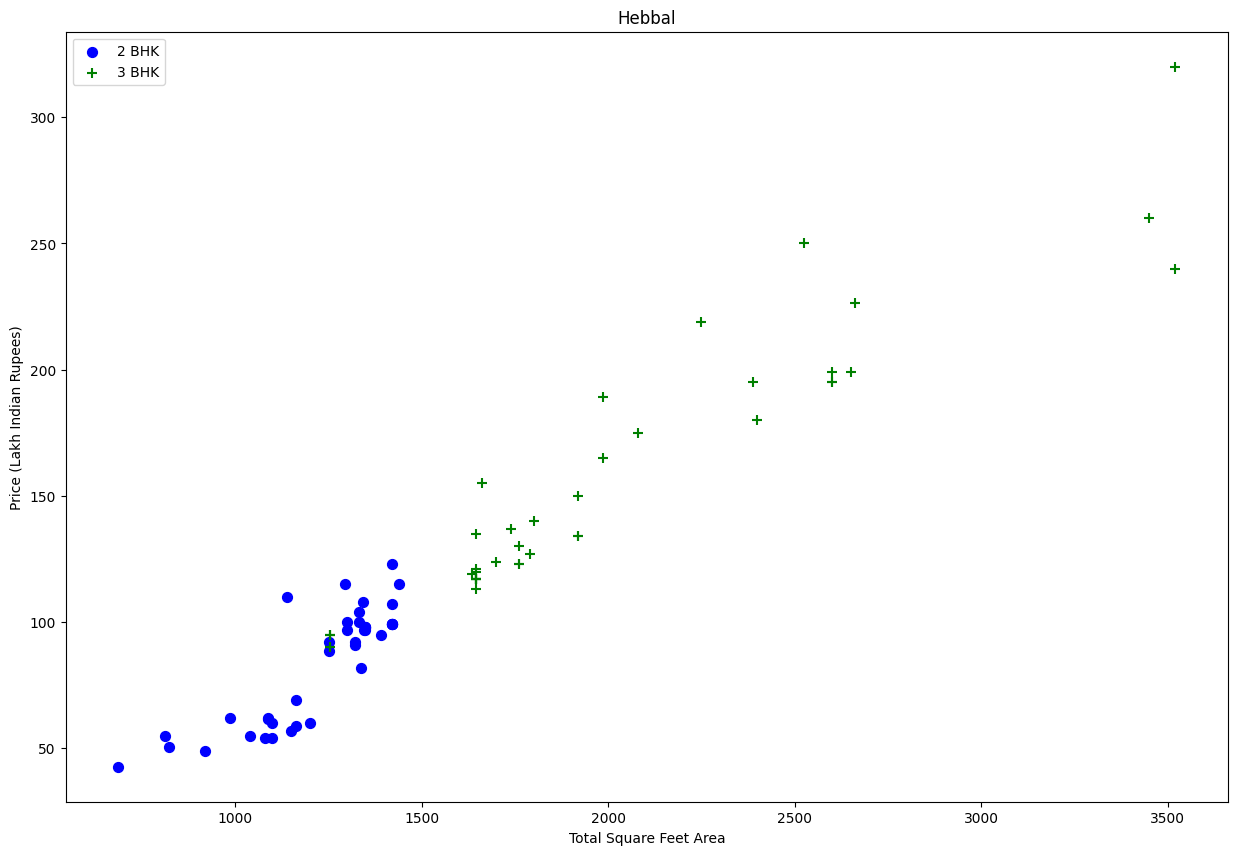

In [62]:
plot_scatter_chart(df8,"Hebbal")

Based on above charts we can see the outliers 

In [63]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


Text(0, 0.5, 'Court')

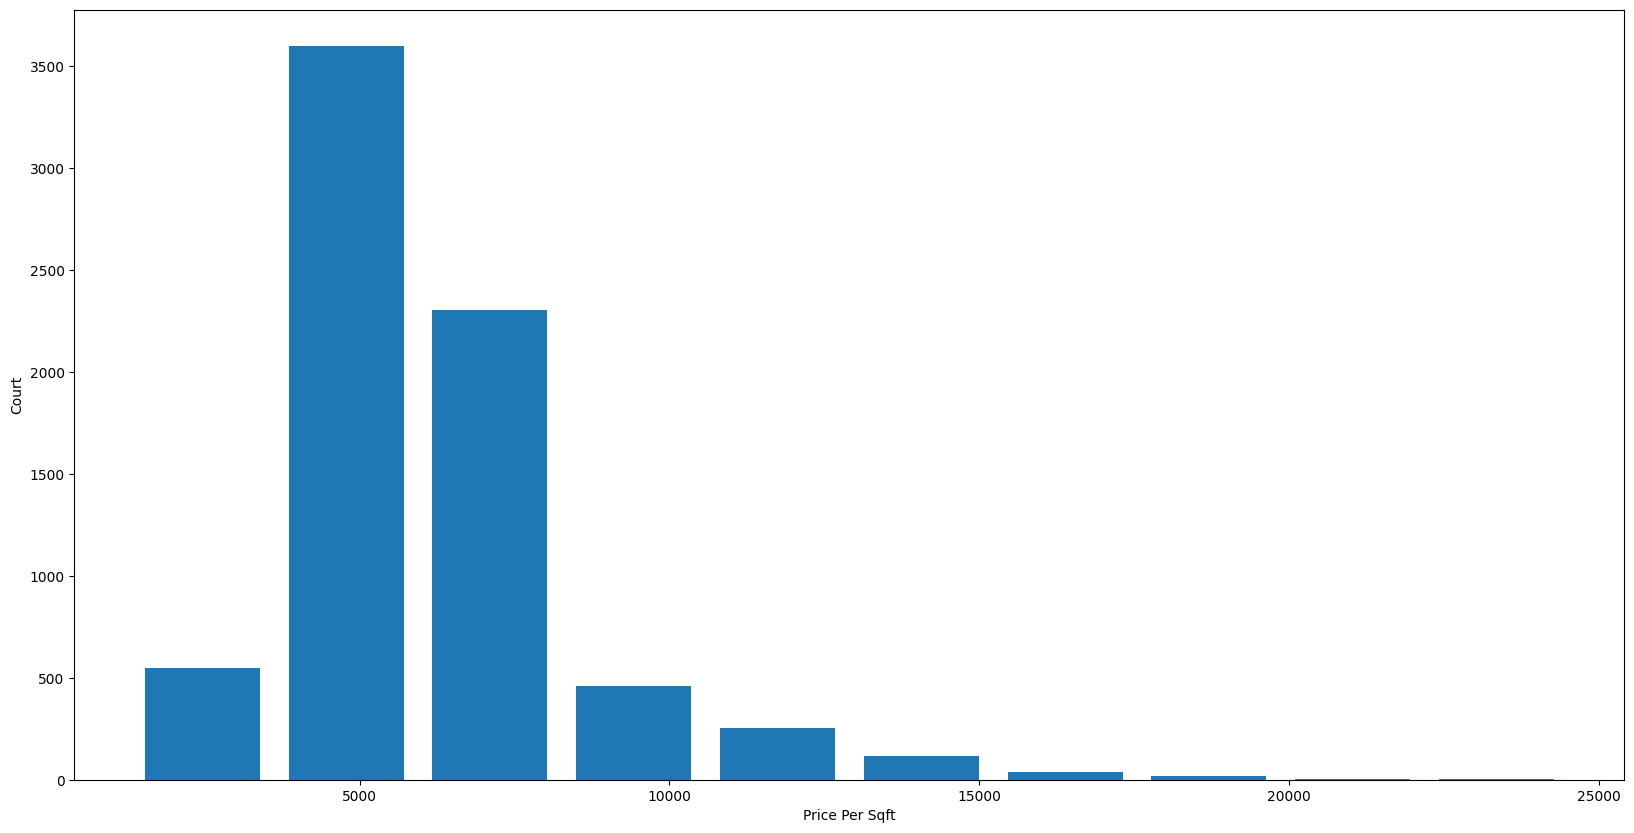

In [64]:
import matplotlib 
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Court")


Outliers removal using Bathrooms Feature

In [65]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., nan,  7.,  9., 12., 16., 13.])

In [66]:

df8.bath.dropna()

0        4.0
1        3.0
2        2.0
3        2.0
4        2.0
        ... 
10279    2.0
10280    1.0
10283    2.0
10284    1.0
10287    5.0
Name: bath, Length: 7310, dtype: float64

In [67]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


Text(0, 0.5, 'Count')

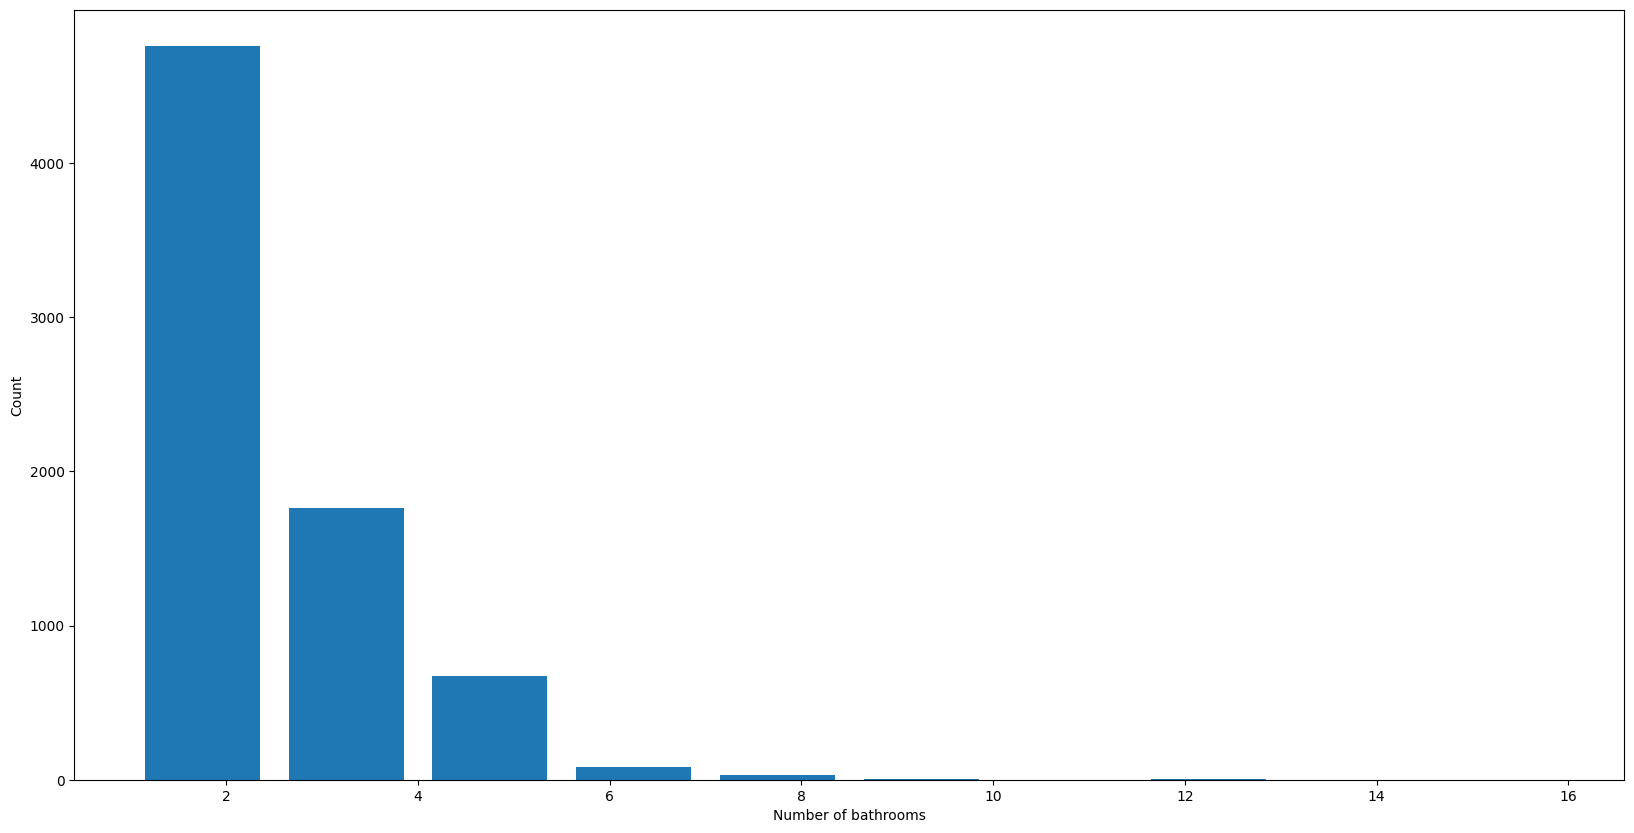

In [68]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [69]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8527,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8616,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9351,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9682,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [70]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8452,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [71]:

df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7232, 7)

In [72]:

df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [73]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10279,other,1200.0,2.0,70.0,2
10280,other,1800.0,1.0,200.0,1
10283,other,1353.0,2.0,110.0,2
10284,other,812.0,1.0,26.0,1


One hot encoding for loaction 

In [74]:
dummies=pd.get_dummies(df10.location).astype(int)

dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df12=df11.drop("location",axis="columns")
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Build a model Now

In [77]:
df12.shape

(7232, 244)

In [78]:
x=df12.drop(["price"],axis="columns")
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
x.shape

(7232, 243)

In [80]:
y=df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10279     70.0
10280    200.0
10283    110.0
10284     26.0
10287    400.0
Name: price, Length: 7232, dtype: float64

In [81]:
len(y)

7232

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [83]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8534323049732276

Use K Fold cross validation to measure the accuracy of our linear regression model

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.8534323 , 0.84248972, 0.86437271, 0.87510118, 0.90147714])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

finding best model using GridsearchCV

In [90]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # 'mse' was renamed to 'squared_error'
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [91]:
find_best_model_using_gridsearchcv(x, y)

,model,best_score,best_params
0,linear_regression,0.867496,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,lasso,0.714710,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.730762,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [95]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0]
    
    x_input = np.zeros(len(x.columns))
    x_input[0] = sqft
    x_input[1] = bath
    x_input[2] = bhk
    if loc_index.size > 0:
        x_input[loc_index[0]] = 1

    return lr_clf.predict([x_input])[0]


In [96]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.71290597441663

In [97]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\rakes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.80873200457553

Export the testyed model to pickle file

In [98]:
import pickle 
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


Export location and column information to a file that will be useful later on in our prediction application

In [100]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))